In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# шаг 2
import json
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/lesson_7/step_1_lesson_7.csv')
df

date user_type  visits
0  2020-06-15    People   417.0
1  2020-06-15    Robots   177.0
2  2020-06-16    People   472.0
3  2020-06-16    Robots    91.0
4  2020-06-17    People   475.0
5  2020-06-17    Robots   138.0

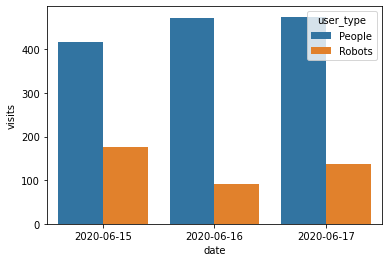

In [19]:
sns.barplot(x='date', y='visits', hue='user_type', data=df)

In [30]:
# шаг 3
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/lesson_7/step_2_lesson_7.csv')
df.head(2)

date        browser  visits
0  2020-06-15  Google Chrome   354.0
1  2020-06-15        Firefox    58.0

In [29]:
round(df[df.browser == 'Google Chrome'].visits.sum() / df.visits.sum() * 100)

60

In [70]:
# шаг 4
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/lesson_7/step_3_lesson_7.csv')
df.head()

date         browser user_type  visits
0  2020-06-15   Google Chrome    People   250.0
1  2020-06-15   Google Chrome    Robots   104.0
2  2020-06-15  Yandex Browser    People    47.0
3  2020-06-15         Firefox    Robots    31.0
4  2020-06-15   Chrome Mobile    People    31.0

In [72]:
# все заходы
df_t = df.groupby('browser', as_index=False).agg({'visits': sum}).sort_values('browser')
df_t

browser  visits
0      Android Browser     1.0
1        Chrome Mobile    31.0
2             Chromium     2.0
3               CocCoc     1.0
4                 Edge     5.0
5              Firefox    58.0
6        Google Chrome   354.0
7        Mobile Safari    16.0
8                Opera    16.0
9               Safari    41.0
10    Samsung Internet     9.0
11               UCWEB     4.0
12             Vivaldi     1.0
13      Yandex Browser    54.0
14  Yandex: mobile app     1.0

In [68]:
# заходы роботов
df_r = df[df.user_type == 'Robots'][['browser', 'visits']].sort_values('browser')
df_r

browser  visits
18          Chromium     1.0
21              Edge     1.0
3            Firefox    31.0
1      Google Chrome   104.0
15     Mobile Safari     1.0
12             Opera     5.0
6             Safari    22.0
23  Samsung Internet     1.0
13             UCWEB     4.0
11    Yandex Browser     7.0

In [73]:
# собираем данные в кучу и считаем процент
df_l = df_t.merge(df_r, on='browser', how='inner')
df_l['share'] = round(df_l.visits_y / df_l.visits_x * 100)
df_l.sort_values('share')

browser  visits_x  visits_y  share
4     Mobile Safari      16.0       1.0    6.0
7  Samsung Internet       9.0       1.0   11.0
9    Yandex Browser      54.0       7.0   13.0
1              Edge       5.0       1.0   20.0
3     Google Chrome     354.0     104.0   29.0
5             Opera      16.0       5.0   31.0
0          Chromium       2.0       1.0   50.0
2           Firefox      58.0      31.0   53.0
6            Safari      41.0      22.0   54.0
8             UCWEB       4.0       4.0  100.0

In [2]:
# шаг 5
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/lesson_7/step_4_lesson_7.csv')
df

date             browser user_type  visits
0   2020-06-15       Google Chrome    People   250.0
1   2020-06-15       Google Chrome    Robots   104.0
2   2020-06-15      Yandex Browser    People    47.0
3   2020-06-15             Firefox    Robots    31.0
4   2020-06-15       Chrome Mobile    People    31.0
5   2020-06-15             Firefox    People    27.0
6   2020-06-15              Safari    Robots    22.0
7   2020-06-15              Safari    People    19.0
8   2020-06-15       Mobile Safari    People    15.0
9   2020-06-15               Opera    People    11.0
10  2020-06-15    Samsung Internet    People     8.0
11  2020-06-15      Yandex Browser    Robots     7.0
12  2020-06-15               Opera    Robots     5.0
13  2020-06-15               UCWEB    Robots     4.0
14  2020-06-15                Edge    People     4.0
15  2020-06-15       Mobile Safari    Robots     1.0
16  2020-06-15     Android Browser    People     1.0
17  2020-06-15            Chromium    People     1.0
18  2020-06-15            Chromium    Robots     1.0
19  2020-06-15  Yandex: mobile app    People     1.0
20  2020-06-15             Vivaldi    People     1.0
21  2020-06-15                Edge    Robots     1.0
22  2020-06-15              CocCoc    People     1.0
23  2020-06-15    Samsung Internet    Robots     1.0

In [4]:
# всего визитов
total = df.visits.sum()
total

594.0

In [12]:
# Доп. задание
# шаг 2
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=sunflowers')
res = r.json()
res

{'total': 85,
 'objectIDs': [436524,
  484935,
  437112,
  210191,
  431264,
  397949,
  656530,
  480725,
  486590,
  375281,
  485308,
  705155,
  11922,
  2032,
  816522,
  343052,
  20141,
  208554,
  360837,
  403496,
  2019,
  437115,
  207869,
  400581,
  423400,
  707887,
  223828,
  682927,
  57922,
  649813,
  79739,
  193938,
  339347,
  208218,
  437984,
  202228,
  436534,
  704667,
  696949,
  761604,
  437329,
  436252,
  436580,
  437526,
  363282,
  190739,
  207753,
  347980,
  822570,
  487043,
  203893,
  367434,
  423237,
  839296,
  262423,
  367817,
  13644,
  820022,
  648617,
  761731,
  814626,
  207967,
  626832,
  262430,
  262428,
  707697,
  205386,
  262378,
  426804,
  664519,
  633526,
  747779,
  369073,
  436529,
  436121,
  436144,
  852414,
  427872,
  436530,
  436535,
  437980,
  724844,
  834585,
  834580,
  834765]}

In [ ]:
# шаг 2


In [13]:
# шаг 3
r_test = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/437980')
obj_test = r_test.json()
obj_test

{'objectID': 437980,
 'isHighlight': False,
 'accessionNumber': '49.30',
 'accessionYear': '1949',
 'isPublicDomain': True,
 'primaryImage': 'https://images.metmuseum.org/CRDImages/ep/original/DP130999.jpg',
 'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/DP130999.jpg',
 'additionalImages': [],
 'constituents': [{'constituentID': 161947,
   'role': 'Artist',
   'name': 'Vincent van Gogh',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500115588',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q5582',
   'gender': ''}],
 'department': 'European Paintings',
 'objectName': 'Painting',
 'title': 'Cypresses',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Vincent van Gogh',
 'artistDisplayBio': 'Dutch, Zundert 1853–1890 Auvers-sur-Oise',
 'artistSuffix': '',
 'artistAlphaSort': 'Gogh, Vincent van',
 'artistNationality': 'Dutch',
 'artistB

In [ ]:
# шаг 4


In [15]:
# шаг 5
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?departmentId=6&q=cat')
cats = r.json()